In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# set the figure background format
sns.set_theme(style="white")

In [4]:
# import data
df_scatter = pd.read_csv("scatter3d.csv", index_col=0)

# extract the data to plot
inf_trigger = df_scatter['inf_trigger']
tt_trigger = df_scatter['tt_trigger']
INPC = df_scatter['INPC']
REL = df_scatter['REL']
INPC_regret = df_scatter['INPC_Regret']

In [5]:
def normalize_regret(regret_df):
    regret_norm = (regret_df-regret_df.mean())/regret_df.std()
    return regret_norm

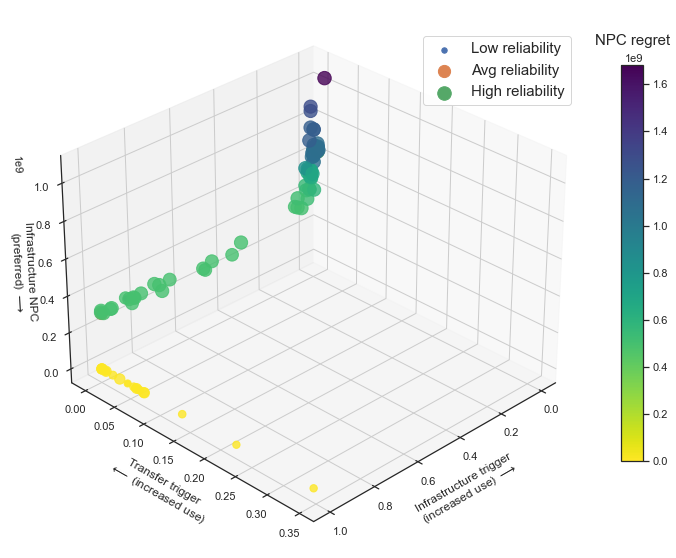

In [8]:
# Create a 3D subplot
fig3d = plt.figure(figsize=(10, 10))
ax3d = fig3d.add_subplot(111, projection='3d')

# Create the scatter plot
ax3d.scatter(inf_trigger, tt_trigger, INPC, c=normalize_regret(INPC_regret), cmap='viridis_r', \
             s=REL*200, alpha=0.8)

# Set labels for the three axes
ax3d.set_xlabel('Infrastructure trigger\n(increased use) $\longrightarrow$', labelpad=10)
ax3d.set_ylabel('Transfer trigger\n$\longleftarrow$ (increased use)', labelpad=10)
ax3d.set_zlabel('Infrastructure NPC\n(preferred) $\longrightarrow$')

ax3d.view_init(elev=30, azim=45)  # Set elevation and azimuth angles

# Create the color bar
# the darker the color, the higher the regret
norm3d = plt.Normalize(INPC_regret.min(), INPC_regret.max())
cax3d = fig3d.add_axes([0.95, 0.25, 0.03, 0.55])  # [left, bottom, width, height]
cax3d.set_title('NPC regret', pad=20, fontsize=15)
cbar3d = fig3d.colorbar(mpl.cm.ScalarMappable(norm=norm3d, cmap='viridis_r'), cax=cax3d, orientation='vertical')

# create legend for scatter sizes
ax3d.scatter(inf_trigger.iloc[0], tt_trigger.iloc[0], INPC.iloc[0], \
             s=REL.min()*200, label='Low reliability')
ax3d.scatter(inf_trigger.iloc[1],tt_trigger.iloc[1], INPC.iloc[1], \
            s=REL.mean()*200, label='Avg reliability')
ax3d.scatter(inf_trigger.iloc[2], tt_trigger.iloc[2], INPC.iloc[2], \
            s=REL.max()*200, label='High reliability')

ax3d.legend(loc='upper right', bbox_to_anchor=(1,0.96), scatterpoints=1, ncol=1, fontsize=15)
plt.savefig('scatter3d.png', dpi=300, bbox_inches='tight')
plt.show()